# Welcome to TTCS - Technion Text Column Summarization tool.

   ## Supervisor:
        - Professor Benny Kimelfeld
            Email: bennyk@cs.technion.ac.il

   ## Developers:
        - Omar Jaml
            Email: omar.jaml.96@gmail.com
        - Samah Anabusy
            Email: mousy.on@gmail.com


In [1]:
from stopword import clear_stopwords
from nltk.corpus import  wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer


In [5]:
print("Please enter the name of the Dataset:\n")
dataset_name = input() 

Please enter the name of the Dataset:

1429_1.csv


In [6]:
selected_cols = ['id', 'reviews.text']
df = pd.read_csv(dataset_name, usecols=selected_cols)
dsf = df[df['id'].str.contains('')]

#1429_1.csv
reviews = []
for index, row in dsf.iterrows():
    reviews.append(str(row['reviews.text']))

# movies_metadata.csv
# selected_cols = ['genres', 'overview']
# df = pd.read_csv(dataset_name, usecols=selected_cols)
# dsf = df[df['genres'].str.contains('Comedy')]

# reviews = []
# for index, row in dsf.iterrows():
#     reviews.append(str(row['overview']))
# #     print(index , "\t\t" , row['overview'])
    
reviews = reviews[14000:15000]

In [7]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
  
warnings.filterwarnings(action = 'ignore') 
  
import gensim 
from gensim.models import Word2Vec 

# Create CBOW model 
model1 = gensim.models.KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary=True)  


In [8]:
stop_words = set(stopwords.words('english'))
import string
table = str.maketrans('', '', string.punctuation)

filtered_sentences = []
filtered_sentences_stripped = []
reviews_str = ""
uncleaned_reviews = []
for r in reviews:
    text = "".join(r) 
    text = text.lower()
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        uncleaned_reviews.append(w)
    filtered_r = [w for w in word_tokens if w not in stop_words]
    stripped_r = [w.translate(table) for w in filtered_r]
    while '' in stripped_r: stripped_r.remove('')
    filtered_sentences_stripped.append(stripped_r)
    filtered_sentences.append(text)
    reviews_str += " " + text

reviews_str.lower()
stripped = word_tokenize(reviews_str)

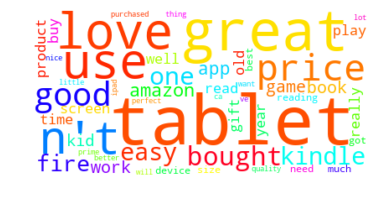

In [9]:
text = " ".join(w for w in uncleaned_reviews)
wordcloud = WordCloud(max_words=50, collocations=False, background_color="white", colormap="gist_rainbow").generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [10]:
def intersection(lst1, lst2):
   return list(set(lst1) & set(lst2))

In [11]:
def getmax(text_l, syns):
    counter_s = 0
    max_str = ""
    for w in syns:
        if text_l.count(w) > counter_s:
            max_str = w
            counter_s = text_l.count(w)
    return max_str

In [12]:
synonyms = []
upd_stripped = []

for word in stripped:
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())

    new_syn = intersection(stripped, synonyms)
    max_s = getmax(stripped, new_syn)
    for w in new_syn:
        while w in stripped:
            stripped.remove(w)
            upd_stripped.append(max_s)

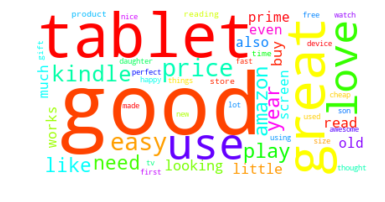

In [13]:
text = " ".join(w for w in upd_stripped)
wordcloud = WordCloud(max_words=50, collocations=False, stopwords=stop_words, background_color="white", colormap="gist_rainbow").generate(text)



plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(filtered_sentences)
features = vectorizer.get_feature_names()
weights = X.toarray()

# print(features)
# print(weights)

In [16]:
import numpy as np
from string import digits

r_vectors = []

for w_r in weights:
    vec = [0]*300
    vec = np.array(vec)
    vec = vec.astype(np.float32)
    print("new review starting here")
    for idx, w in enumerate(w_r):
        try:
            if w != 0:
                print(w, features[idx])
            vec += np.array(w*model1[features[idx]])
        except:
            continue
    vec = vec/np.linalg.norm(vec)      
    r_vectors.append(vec)  

# r_vectors

new review starting here
0.19516834216892873 50
0.1732155364470413 best
0.2463014489509489 bucks
0.0682013819128851 for
0.3092542274326211 further
0.1607228675189377 if
0.07082344844503496 it
0.22788894158695694 look
0.21877631861632985 most
0.17475503406939336 no
0.13160601318396978 not
0.327666734796613 savy
0.327666734796613 seriously
0.2463014489509489 someone
0.2545808222927054 spend
0.08903791436709005 tablet
0.2647139563149408 tech
0.1225760305103318 that
0.14260460342330528 the
0.19769181526967936 want
0.18241233150972472 will
0.25791994732848605 you
new review starting here
0.1836510047531222 also
0.07269341798599886 and
0.25650058361060557 anyone
0.14134286569089144 as
0.199563199010971 because
0.1420510868954629 for
0.15303099820531393 games
0.17446912321324293 gift
0.1766029252124545 got
0.10443380780332753 great
0.18974400071025188 is
0.22126856261107414 it
0.1562306605862278 like
0.1890104604802874 little
0.2527152635312573 mother
0.08847644519940086 my
0.1704702982351406

0.21327391727814388 get
0.3487400085024214 hand
0.16347872697623586 have
0.12001667805188676 is
0.09330437411281384 it
0.23675901168909802 perfect
0.11730051352666168 tablet
0.09393522597493846 the
0.29392270419950417 thought
0.3353903940949883 traveling
0.2172905415506695 well
0.2509777730624418 who
0.21173985295434272 would
0.1698947155571706 you
new review starting here
0.30469412872895774 around
0.2778679887302791 cheap
0.32445234454192234 etc
0.18559085845136333 fire
0.09118722696830844 for
0.1218028642848297 is
0.09469300601980274 it
0.30816453603548644 keep
0.2426639617602385 nice
0.36203768058529634 remote
0.25324993201405915 small
0.11904627558056455 tablet
0.10059669381179702 to
0.30469412872895774 tv
0.43809993401641495 vids
new review starting here
0.3229801710611868 beginner
0.08652534703303978 for
0.19388939442868178 just
0.3229801710611868 learning
0.2996206943946764 ok
0.4153435791582796 or
0.3757691078721052 person
0.31247634208413444 someone
0.33583581875064483 techno

0.08545628131843673 great
0.05287258991849096 have
0.06848129185813845 if
0.056075093347096476 in
0.1105111748719136 install
0.12620168998153342 instructions
0.13176798880023136 ios
0.08213933291361464 ipad
0.12620168998153342 iphone
0.13176798880023136 ipod
0.2112367034488698 it
0.0765730340949167 its
0.06511756483910845 just
0.1066284405548995 looks
0.08264192703791763 lot
0.10062731926041783 lots
0.10062731926041783 make
0.13176798880023136 moment
0.06706489486868812 more
0.08721576288690999 music
0.08213933291361464 need
0.07446016037745812 no
0.056075093347096476 not
0.048664658268070315 of
0.10160245014022382 on
0.09605348341142547 online
0.07082157801760747 only
0.1394927377334969 or
0.0765730340949167 other
0.12620168998153342 otherwise
0.12188413318873557 picked
0.07082157801760747 play
0.09820556440850164 problem
0.12620168998153342 return
0.06923037066440979 screen
0.1105111748719136 search
0.13961324635504124 spare
0.11537380393092883 specifically
0.08423313439111532 store


0.31962222043000094 they
0.15330164867501986 to
0.3469603177001669 what
new review starting here
0.18486719840740942 all
0.29887573910357496 anyone
0.38329660405168586 apps
0.08275931186729706 for
0.37526610658809767 gps
0.1809495285846139 has
0.11054532051053194 is
0.26068055536131357 needed
0.15969798240475294 not
0.16674211278593473 one
0.2016949494872012 only
0.23117135730262792 some
0.21608701514382486 tablet
0.2584311000866529 things
0.297480145395343 this
0.14329724580693567 with
0.31472817264845904 working
new review starting here
0.1902188014999281 all
0.2392634407882134 battery
0.15926164636999499 but
0.23649707883290058 don
0.24683456030963224 fast
0.15558076179945604 good
0.12520941893833565 great
0.08842892525770306 it
0.4487752079753275 its
0.30752770301845295 last
0.1873105141315228 like
0.28147260001010427 long
0.36981811115187513 moves
0.20753368845614664 only
0.2877790015289826 problem
0.11117119043955757 tablet
0.1530462986251828 that
0.08902681311338978 the
new revi

0.26903248584286255 great
0.09500185283268908 it
0.30916963280872917 keep
0.2745716655597658 music
0.16024182845371562 price
0.22562785714427952 product
0.11943455201558822 tablet
0.10092479584991564 to
0.3632184877905312 useful
0.25554379081869466 your
new review starting here
0.18521651697201874 an
0.15972777203242958 can
0.2618619764837 definitely
0.19925707023948325 do
0.1647862699166929 for
0.256682450514018 it
0.20658262767154464 much
0.10263704205675903 my
0.2695293430524335 myself
0.1589913826005353 not
0.3736057039114213 okay
0.19212233104837514 old
0.14403822677035788 on
0.3958495963607079 pouches
0.22882652012083127 purchase
0.15212490892669975 was
0.29316217523190274 wouldn
0.21926146035548477 year
0.15579473929010446 you
new review starting here
0.4587820878802847 as
0.26878433297165205 be
0.22346346949108487 can
0.2820325140582054 does
0.31832849881798053 everything
0.4576536137025925 expected
0.21060203938601754 good
0.15397160016371703 is
0.3258223379506579 need
0.20190

0.1765540515369151 tablet
0.324075156398644 this
new review starting here
0.1119712409802141 and
0.3741375478412573 display
0.2050554632504938 easy
0.3950933860966674 found
0.24515269495965367 just
0.3477021542036199 right
0.2606364654969825 screen
0.2778559083224938 size
0.11437637878189394 the
0.19466126155466668 use
0.4751204146512312 versatile
0.21561709981007676 very
new review starting here
0.21761678151974706 amazon
0.10572909246830185 and
0.18834610556461798 bought
0.2777145097021646 device
0.18795639991310847 have
0.107274839844695 it
0.23148597557137712 just
0.40334560548469295 love
0.2994397800062023 new
0.29378320812116004 now
0.2517631321044763 play
0.3198855909682892 prime
0.12377525785688068 this
0.35328020878648625 though
0.22792589803959898 to
0.17886894797327815 with
new review starting here
0.3037838390072096 advertising
0.15267599772098853 and
0.31283834038394015 filled
0.24399182315340034 getting
0.10966973519697472 great
0.1992570677140901 is
0.13064354543608936 p

0.1310088441260647 best
0.11558930452462116 books
0.18099180017019365 both
0.21635486865459283 breaks
0.17050323322326988 children
0.23389956644815077 constant
0.23389956644815077 decision
0.1743233629585773 expensive
0.10316608308330523 for
0.1743233629585773 going
0.12825971594733884 got
0.14166135299231192 happy
0.24312042129916364 if
0.1505166914769761 internet
0.06890177952752363 is
0.05356620028505793 it
0.1764055620870716 made
0.11904598359969369 more
0.12933310852114346 much
0.06425694090657769 my
0.0995381362487823 not
0.09017656433193764 on
0.18927469595551435 products
0.09930992433349899 so
0.14952109229291127 store
0.10785674682972234 the
0.11864427414449097 they
0.12361090936691319 this
0.05690581464496412 to
0.21635486865459283 usage
0.1440867674939397 using
0.1440867674939397 ve
0.09753684591362075 you
new review starting here
0.3930222978860919 able
0.43405205915857353 child
0.2734647408281028 games
0.3328354063726372 her
0.13180151045097885 it
0.41952917242612636 loved

0.1333989134392068 really
0.21874077033825887 so
0.07416446032567722 tablet
0.1021001583009071 that
0.05939151611999014 the
0.17739523179160735 things
0.13613314942387206 this
0.1496933287096956 we
0.15194102668882406 will
0.09836373457566364 with
0.24671284461195056 worried
0.18223054434230676 years
new review starting here
0.05348270067619893 and
0.18335162298436603 basic
0.10130297780400231 can
0.14512697193360494 don
0.17659624078268907 expensive
0.1567667879357807 for
0.16049991373743158 go
0.09547248939608227 good
0.19505869559385552 here
0.12314514741531782 if
0.14770545335500773 ipad
0.12449216376855869 kids
0.16459800683551884 looking
0.14860923343637036 lot
0.16607880804882555 money
0.13101939055065548 much
0.08751027256833775 of
0.12542004747181396 or
0.17272630310418202 pretty
0.0915293790790172 price
0.3384880832028332 re
0.2510567972219032 ruin
0.3321576160976511 something
0.19505869559385552 spend
0.06822045462196479 tablet
0.09391721028745786 that
0.054631506959010284 t

0.2712920191342905 in
0.07299756244362549 it
0.1687169125160712 or
0.3187476079407216 palm
0.2623958573082456 perfectly
0.17065394080500002 read
0.17853284774479805 size
0.3187476079407216 slim
0.13533501282950808 so
0.0917711698111684 tablet
0.2579348798959886 watching
0.3927096845199587 your
new review starting here
0.21610722903650642 all
0.32326328566953694 available
0.46479932092073184 becoming
0.35498656506216497 enjoyed
0.4386809512163932 familiar
0.17602301021594685 have
0.1929962483251586 kindle
0.12051452846707884 my
0.16912703866567358 on
0.4057756969067908 services
0.10114319793931018 the
0.16751252243058193 with
new review starting here
0.1008790170696972 and
0.17970616747666152 bought
0.29569336021157655 for
0.24211646867607384 gift
0.14492618688083267 great
0.20470771378438618 it
0.3257961819229291 loved
0.12278163653352453 my
0.36791951852876975 niece
0.2298302225789996 old
0.37483407737406366 priced
0.22372092058665094 she
0.35070117886674335 starter
0.2383652985766076

0.09469189775338348 an
0.043112644123263016 and
0.0787816157835632 but
0.08166078330884248 can
0.13779680889752063 card
0.16349625129302597 customer
0.14235501921387345 expensive
0.1169875009031606 first
0.04212346954043594 for
0.12937969801991836 go
0.07696080053651902 good
0.16349625129302597 graphics
0.1498790884098778 hd
0.23813205260943648 ipad
0.11253241082598202 is
0.043742946105311 it
0.11046308341293692 me
0.15723768657831091 mini
0.20237800665460662 models
0.1944293982751555 more
0.0812843043968557 not
0.07054242195453447 of
0.33448288137822085 offers
0.07363950723670026 on
0.08486967992567064 one
0.10110166098963277 or
0.14586550215394173 performance
0.0737822416812433 price
0.09891505353593998 really
0.20237800665460662 reminds
0.1440553736122357 resolution
0.13387686966621598 right
0.14235501921387345 sd
0.16724144068911043 service
0.12937969801991836 still
0.13153824418280552 storage
0.05499281346786718 tablet
0.22019351001935708 the
0.1183559312167303 there
0.10094248458

0.44848698858881597 member
0.44848698858881597 present
0.3700094446496517 value
new review starting here
0.09382988023924703 50
0.10153263591697496 able
0.10517974148279488 access
0.10726054236799647 add
0.08478200965417976 also
0.13814442457746523 amazon
0.14741566792648023 an
0.06711745545600674 and
0.09504307483935 app
0.07592994204081524 apps
0.32625283536192756 as
0.15753031533023898 avoided
0.11213218671967942 being
0.12264665495782962 but
0.08119496433257717 buy
0.06356446116554065 can
0.10726054236799647 card
0.13354553818002127 compact
0.14867824771687446 delighted
0.10153263591697496 did
0.15753031533023898 doubles
0.11080863694777013 email
0.0991486095322736 excellent
0.10070869341643901 far
0.06673405810911986 fire
0.03278875777659778 for
0.19265534773886075 free
0.12031245101964808 gifts
0.04821159630085793 great
0.07169115026069924 has
0.15753031533023898 hundreds
0.14867824771687446 increase
0.1272648962565326 installed
0.09567592741091696 internet
0.10214805759803304 it

0.13857727174655454 no
0.09454579651603891 on
0.1718845732764234 our
0.09472905333369004 price
0.12699708179634925 really
0.07060529798583744 tablet
0.1130826186847003 the
0.15195723340889508 there
0.06480005071576883 this
0.20187753663398672 through
0.1789890403962765 to
0.20187753663398672 trying
0.09622968242002852 use
0.14250952590537116 we
0.18728649167585334 with
0.3067880947189534 you
new review starting here
0.06129159375449129 35
0.08317509547705111 64gb
0.05680041846143298 able
0.06975728782798549 added
0.08194903087791368 all
0.06975728782798549 almost
0.049832117410146884 am
0.038641078571673475 amazon
0.04123438513328214 an
0.09386882162414152 and
0.05316996228829132 app
0.1346128267491211 apple
0.08495499880840982 apps
0.04190933115407796 are
0.12258318750898257 around
0.10950940496377848 as
0.08381866230815592 at
0.06847047614065493 away
0.058840719301066345 back
0.051539087993666556 battery
0.04658697441809512 best
0.06000478206716075 black
0.08812720905262254 bottom
0.

0.07464053474530019 easy
0.16702792708181843 enjoying
0.12656417103185139 enough
0.1169918138972233 even
0.12041789455324264 excellent
0.15456566592353588 eyes
0.15929030957066315 for
0.08580136770080085 games
0.14551400770181314 good
0.19132359989578146 grayish
0.058553911617998715 great
0.15957840207105192 is
0.1378979536068217 item
0.104934373495806 its
0.26326009470576384 kid
0.10597432029560981 little
0.13163004735288192 long
0.14381465943466193 longer
0.14612178737222004 looks
0.11325108036675913 lot
0.049606943014437854 my
0.07684434682061307 not
0.104934373495806 other
0.16702792708181843 played
0.13026999310957285 playing
0.14864896009569564 probably
0.17294463290965867 pros
0.1361866989374131 resolution
0.09487211338063632 screen
0.17294463290965867 sensitive
0.19132359989578146 strong
0.19132359989578146 tabs
0.09542874669123262 this
0.08786361331415106 to
0.1378979536068217 touch
0.07085702778318966 use
0.0784849882804385 very
0.12041789455324264 which
0.23729911290106506 w

0.16591532673085022 memory
0.06318072152990928 my
0.08493715551625289 of
0.118265562358391 old
0.0888380858266617 price
0.2299820558717942 proof
0.17563050002579728 put
0.13242905532239874 tablet
0.10605028795998982 the
0.16591532673085022 thought
0.19685894157915937 until
0.09364417871030883 was
0.08781980203615375 with
0.11952423675653301 works
0.13497171188254103 year
new review starting here
0.14467354112346617 an
0.06586898182939192 and
0.1808282660749392 battery
0.2918252705127598 beginning
0.24474801349948558 charging
0.15746443312773006 does
0.2918252705127598 fail
0.13098543236259722 fire
0.2794976431936234 functionality
0.1562400193721588 had
0.22581478814740105 however
0.13366395779098536 it
0.16958554647600882 its
0.25677514475733404 kindle
0.2970559278496075 more
0.16136271628705795 much
0.24979520102741817 often
0.15006770679022308 old
0.3092000853598287 replaces
0.2699355925735549 require
0.06728384493860787 the
0.07099865555414293 to
0.11882552175859849 was
0.1114349438

new review starting here
0.13907727142515414 and
0.2717725774320252 for
0.2472400229354778 have
0.18150940359660223 is
0.14111056540699551 it
0.26528273790374074 love
0.44451934188419934 myself
0.22756311436404658 of
0.27378147990741 one
0.49073770742756273 present
0.3616153957635247 these
0.16281540615550807 this
new review starting here
0.12092165993932481 amazon
0.26585436679779967 apps
0.24076060388462506 choose
0.16638769766444025 christmas
0.1612841127194028 daughter
0.11682835707230536 fire
0.1148036492915811 for
0.1236774559960412 games
0.14100344088407352 gift
0.08440190432376439 great
0.15052849665709467 her
0.07667418880346853 is
0.1192173840009544 it
0.12626337720127792 like
0.16324454823851534 lot
0.11206217600460032 love
0.20730008961908464 must
0.14301078586906943 my
0.1622517622071401 need
0.16638769766444025 new
0.13384819454866725 old
0.10034885842786032 on
0.1398955339426995 play
0.10054336324063953 price
0.24076060388462506 required
0.20730008961908464 school
0.3908

0.16291539169743344 tablet
0.13046399946421064 the
0.24594474395573016 very
0.3017887358253429 well
0.2940795401903594 works
new review starting here
0.0648765284741239 and
0.2325908841846381 apple
0.37843183212442477 as
0.2371034226064532 but
0.1550919035902648 does
0.06338800429998184 for
0.22891848914640345 friend
0.2874283152110588 generic
0.16170004451984926 he
0.30454134229682917 impressive
0.17917227307547 ipad
0.2633000639375758 it
0.25817340217873114 loving
0.12231779321223497 not
0.1061532536367347 of
0.16315556523763475 purchased
0.30454134229682917 respectable
0.26586845084590877 solid
0.22554021319356804 think
0.15826677713519074 what
new review starting here
0.2467901578058471 all
0.3543985876624539 enjoy
0.11472781999921414 it
0.43863634281962344 others
0.4798025709917327 suggest
0.11550352059816456 the
0.12188058934091012 to
0.530791580964192 upgrades
0.2603570515036522 would
new review starting here
0.1417189301924943 about
0.1119971907654067 all
0.13620800880837586 am

0.23166729162071323 mickey
0.23166729162071323 mouse
0.14472150818169968 music
0.24026949398815434 my
0.23166729162071323 ol
0.22487561186384505 old
0.18337675861567557 surf
0.05041223099474746 the
0.1109086400282192 they
0.17999401018151445 three
0.19639478962089846 tube
0.08579838413957797 use
0.1436687445242863 watch
0.15467947100597546 web
0.08349231730195486 with
0.384962186226947 year
0.0911774210000841 you
new review starting here
0.177587893854341 can
0.3132775533323472 cheaper
0.22153720038261074 do
0.22413310007271542 does
0.25297775868084144 everything
0.39783379641794525 except
0.517866324183811 ipad
0.12236224671857647 is
0.09512788581082546 it
0.34194515975145656 mini
0.11959299831778214 tablet
0.2223902833276461 than
0.1646403682613755 that
0.19154213369147582 the
0.10975992704963333 this
new review starting here
0.1145273281726371 ability
0.10172846057257143 access
0.0668057339314151 amazon
0.06491511887015403 and
0.10078983886373576 android
0.14379964285555086 angles
0

0.20245715298677644 games
0.3647135880340075 load
0.22552902127181468 or
0.45144771432028685 sold
0.2624734813864996 some
0.16270063652741215 with
0.35734443976686064 won
new review starting here
0.2870884143718459 10
0.07570290170471458 and
0.2812877061978226 done
0.14793195541261125 for
0.29366471490926377 gets
0.18169208782649016 gift
0.18868399502628327 he
0.2529515414880016 him
0.15361933913481132 it
0.27140485560760563 job
0.2760987959189378 larger
0.32839729457037026 loves
0.18427868216082133 my
0.17247208838930161 old
0.29366471490926377 table
0.09656367956743554 tablet
0.07732899702162756 the
0.08862410487278474 this
0.13656559648973773 was
0.20660896127314599 who
0.2760987959189378 yr
new review starting here
0.7293199701810534 especially
0.21580895228567562 for
0.22410593125084363 it
0.4213110113422024 love
0.3780046717004792 price
0.22562116186448913 the
new review starting here
0.1345386637697742 and
0.5218988631946124 connection
0.24638369444604438 easy
0.1314518146721386

0.3041881675233734 got
0.4183736434768732 granddaughter
0.17988110097817364 great
0.1270407016384777 it
0.47483492377311637 operate
0.4087794603410993 picture
0.3397616192080188 quality
0.1278996523999645 the
0.13496112439063557 to
0.24111055456463565 very
new review starting here
0.09448377448476386 also
0.1195345679767289 always
0.03739891606228213 and
0.15326331588104286 bag
0.10523363103431388 camera
0.1416765240292788 can
0.15869243165892882 capability
0.3550424880867821 doesn
0.0684894798975455 easy
0.17555680561108583 expand
0.13639894192888588 fact
0.0365408370011064 for
0.05372853994640081 great
0.19945406111832042 have
0.12821252238907785 hold
0.07051167793437847 in
0.16569177925093537 inch
0.04880923302609791 is
0.1897284199308395 it
0.08037670429452895 like
0.1426730154534795 love
0.1195345679767289 memory
0.09161809571661989 much
0.04551888244048193 my
0.26003116073819404 off
0.0638800473972119 on
0.07362188286800622 one
0.0890546587068779 only
0.1925736649295661 other
0.1

0.22228507494001865 use
0.3044632576403109 when
new review starting here
0.11623886116686924 2015
0.09605764443952834 30
0.11623886116686924 accepting
0.09854091410545505 along
0.06572803836134666 am
0.0990495901727776 and
0.16756010333518873 another
0.09629450167844088 as
0.07761028943639102 back
0.08274037703233297 bad
0.06797951459447228 battery
0.22566228356527443 be
0.06967680566586208 been
0.13008485994183755 better
0.07914567597265104 black
0.09380620563196232 can
0.07372532168317082 cheap
0.0799719784071313 children
0.0920091284222196 disappointed
0.11623886116686924 discounts
0.1721706309641245 down
0.11623886116686924 dumbed
0.11623886116686924 firehd
0.04838850039801126 for
0.08274037703233297 friday
0.11485814541810024 get
0.04420359680744944 good
0.060158291666022795 got
0.04402053386423789 have
0.11623886116686924 hdx
0.07761028943639102 how
0.05701598941824603 if
0.06463468780527526 is
0.10049768398090604 it
0.10507269978869048 kind
0.09653053739560273 kindle
0.083780051

0.15254374838190615 messenger
0.05881101597700129 on
0.0807432263316309 or
0.11240924223754929 over
0.15254374838190615 properly
0.15254374838190615 related
0.16162596178843017 rely
0.16162596178843017 resolves
0.15254374838190615 responds
0.11119816381907437 see
0.10023253110193434 slow
0.13701760201298974 sometimes
0.1317573957040472 tablet
0.14609981541951375 thanksgiving
0.1813867572099216 that
0.07034161157084177 the
0.08061610263781696 this
0.037112622321140806 to
0.19376619173726575 too
0.11969853946413622 tried
0.16209597211652402 up
0.15254374838190615 updates
0.06630238885160784 very
0.11119816381907437 wifi
0.08997730129861804 will
0.09751410926866191 work
0.12722243402969544 you
new review starting here
0.21980381538883442 and
0.4373499951791883 beautiful
0.30171062091385825 daughter
0.20126584645403686 easy
0.10738032322873918 for
0.157888774848755 great
0.11150866115756812 it
0.3718374801528876 item
0.23837586368714772 loves
0.13376355635537124 my
0.3588019409800184 pictu

0.1378942359411508 is
0.0714685969044588 it
0.13729474735771757 kindle
0.0671791832392932 love
0.11374361800252548 loved
0.14433148901645582 matter
0.14433148901645582 mention
0.13662215482189238 months
0.10179953536663451 movies
0.04286614864902829 my
0.10839097738451532 needed
0.06640242259417549 not
0.05762721042148499 of
0.14433148901645582 oh
0.06015726794295317 on
0.0693313720732879 one
0.18082160984524678 price
0.11768109312788233 resolution
0.16532576641162575 speech
0.10569230365902911 still
0.13662215482189238 text
0.06184630307496474 that
0.28780724865974516 the
0.08246149817912135 this
0.11768109312788233 those
0.07592434607528539 to
0.11915981551184103 touch
0.13662215482189238 updated
0.12626616110039832 watching
0.12243857704720025 were
0.08591797760538672 what
0.1040550183957109 which
0.11916599232339944 with
new review starting here
0.0855276679007667 also
0.13478999260855307 am
0.08463469231268163 and
0.11945427012986574 anyone
0.07557319429145673 are
0.07945789766498

0.16895527985383738 centric
0.16895527985383738 comparing
0.13649484619843572 complain
0.09766701570604998 could
0.15272506302613653 designed
0.07157397888763235 fire
0.07033355750721788 for
0.07577002575546066 games
0.12850144941505137 good
0.051708166317928274 great
0.19195391825984698 have
0.08287376830433762 if
0.06786020192665364 in
0.13126988341548515 instead
0.0994022726477928 ipad
0.046973841866571255 is
0.03651879877178303 it
0.09358448697713295 little
0.12026462937073489 made
0.11884508849287508 makes
0.13126988341548515 mini
0.06786020192665364 not
0.058892341316696926 of
0.08570590431817707 only
0.08440472217588363 or
0.27298969239687143 os
0.25807634282090164 paid
0.13373692658057962 people
0.12177581519270671 performance
0.08570590431817707 play
0.15946121163105892 poorly
0.061597104831520345 price
0.08537376749644857 read
0.10477781635696375 slow
0.06770461827563483 so
0.09823126598090345 some
0.10193612114587791 store
0.18364300237961423 tablet
0.12640811738854418 that


0.3023225707478044 storage
0.20243380447900586 the
0.11600121176359347 this
new review starting here
0.17998963865778658 35
0.17279237096991168 ads
0.1230714508914081 at
0.25879543248356834 bf
0.09821099085215632 bought
0.10074376492529537 but
0.20885113044350462 can
0.20907451240506475 complain
0.18421405236581298 display
0.1317951643662942 does
0.15512917861853479 download
0.21939253557067748 either
0.10773267014167812 for
0.23393497244431655 instagram
0.07195167698689678 is
0.11187455438030622 it
0.25879543248356834 knowledge
0.20107123186660503 let
0.21386375766701024 lock
0.1412571549541388 me
0.06710123726818001 my
0.09020771031369659 of
0.18652879499296596 ok
0.0941681778481185 on
0.25879543248356834 opt
0.1412571549541388 out
0.18870140546539357 price
0.12648985174884966 really
0.20107123186660503 reason
0.12832954024671409 screen
0.15046468500379898 some
0.07032329836707053 tablet
0.09681213702614858 that
0.16894644511285092 the
0.059424717650073094 to
0.19166125878231338 woul

0.41879468999207276 our
0.3094268583095422 really
0.36807549478121526 them
0.35066387472447796 these
0.30308161303242803 they
0.3472227413130129 we
new review starting here
0.49724718276049706 absolutely
0.14696854646977353 and
0.49107655773602915 child
0.14359650669816287 for
0.3527344586747155 gift
0.14911721000044817 it
0.28033493894231726 love
0.1874673666163465 tablet
0.33028109234565 they
0.17205358819854571 this
0.26512652437237294 was
new review starting here
0.10915817831987572 and
0.4234435483247074 budget
0.19990383804817707 easy
0.3200982445615562 features
0.15682030822948673 great
0.44733768050863226 interface
0.30331140720884514 lot
0.17860844379697924 of
0.3563738526169727 picture
0.13923793033139467 tablet
0.4139609925628607 wonderful
new review starting here
0.3661346090983899 apps
0.19342149244642076 does
0.2276662986434884 download
0.11623829474369553 great
0.2773796753487368 however
0.2854936640422825 longer
0.15254755127880346 not
0.3315754811604587 pick
0.31386468

0.08270417371450518 bought
0.17606313349647157 break
0.17587502195831015 can
0.13822585065196505 cheap
0.3386470280972659 couple
0.04536122377350603 for
0.15512796332998863 friday
0.2786485300312902 google
0.06669776949714235 great
0.1393242650156451 having
0.2423640751790103 is
0.2826310731442505 it
0.10164721101471695 just
0.17606313349647157 load
0.056506429019129924 my
0.07596455426666658 of
0.15859938427570025 on
0.19699830366295454 side
0.08733140904427317 so
0.12526886798784312 son
0.059219749580598835 tablet
0.10433369782136014 they
0.05435063494764485 this
0.050041977265716193 to
0.16644485438043705 top
0.109700214176288 well
0.13716598519738446 worth
0.17154438983893927 you
new review starting here
0.08593753286721761 and
0.16709431888588894 as
0.1530893650886528 bought
0.15703740360659782 but
0.3193163135385363 cannot
0.3080973539175251 gifts
0.2243137239816579 is
0.188153829466845 just
0.38073677594002797 palm
0.22125381430420096 perfect
0.14707202372859104 price
0.23319416

0.26922501342862376 stylus
0.1463147225244926 tablet
0.0585850228212116 the
0.13428456093978355 this
0.23503684823018672 under
0.17975598699058143 web
0.26922501342862376 wont
0.21191806768582402 you
new review starting here
0.5709481962866608 beginner
0.27887325084756376 bought
0.15295518192116073 for
0.2249006666599141 great
0.19053611016959004 my
0.3566572155735757 old
0.39937051150355124 tablet
0.18326690870282653 this
0.4070384817124283 year
new review starting here
0.07258847277735833 above
0.06213393417860528 account
0.05236730375374427 after
0.0504239606621365 again
0.035759231551790664 all
0.05616905819486204 already
0.06744559447512952 amazon
0.07197204945954522 an
0.08192108904746252 and
0.07258847277735833 angles
0.04552586197665168 any
0.07691027558875316 applying
0.03657506283758268 are
0.12742789437929272 as
0.18287531418791342 at
0.051351404247730555 back
0.03732776681732367 be
0.051847255383467204 before
0.043035789957062566 better
0.055433671647423376 big
0.0695221048

0.22581740197859443 lenovo
0.22581740197859443 megapixels
0.12508046941745682 nice
0.09069864232758208 not
0.08216842572007335 on
0.21312809258187085 rating
0.1787462654919961 returned
0.18243236659229217 samsung
0.14004092855333422 slow
0.19714145339117675 star
0.12272414843971932 tablet
0.16974305719556856 takes
0.04913925894129464 the
0.16723806561353075 think
0.05185228821186035 to
0.18527015127734733 very
0.22581740197859443 wedsite
0.12571272703636657 will
0.22581740197859443 zero
new review starting here
0.09794770341351985 access
0.138455302381556 accessible
0.138455302381556 affected
0.06820718260075558 all
0.10318956249946645 amazing
0.2121272596330563 apps
0.138455302381556 appstore
0.06976329975055598 at
0.1044221065111211 bad
0.14669871200556692 band
0.13260651017408498 bang
0.08579322899126199 battery
0.07119900783382821 be
0.1280698344857078 buck
0.11421361200469254 but
0.09164202119873299 by
0.059193841913948934 can
0.1280698344857078 checking
0.138455302381556 comcast


0.18974915496868455 paid
0.09057783803461315 price
0.12554114849795567 read
0.18675319122892317 school
0.12319794103128667 screen
0.16148126575525845 storage
0.16219067053808342 the
0.16916451375831718 their
0.11409692338614956 to
0.14444795294015553 using
0.09547805058133205 was
new review starting here
0.19869905618877406 and
0.0788733394200515 any
0.08039198548936279 app
0.1284503644073206 apps
0.25346448987416104 are
0.06336612246854026 at
0.07792613415176797 because
0.07455930148525851 better
0.05056615184934725 bought
0.1037404158309758 but
0.08451265564541378 cheap
0.1257591839620306 clearness
0.06707179866269804 do
0.10352607539015399 expect
0.12044671616539802 extremely
0.13324668678459106 facebooking
0.13324668678459106 feeling
0.11295921334283757 feels
0.13324668678459106 flimsy
0.027734301987241004 for
0.08147856088436584 free
0.059756078047589686 games
0.05067137409492571 good
0.06733007495865724 had
0.07616609308773327 happy
0.050461525766998985 have
0.1054717105202771 in

0.09332007605711654 never
0.07075594821435541 no
0.10657098724658291 not
0.07853069185168808 now
0.11127173498122586 one
0.06627665638454606 or
0.11992346236741137 owned
0.11582069354049616 pixel
0.048367556292578925 price
0.09332007605711654 problem
0.13266782637935234 puncture
0.17886979659882085 re
0.1973589835192414 screen
0.08481417322789336 still
0.11582069354049616 stock
0.0360502465157621 tablet
0.0496293758477157 that
0.2020853588589322 the
0.07758760150467332 there
0.12702706624052665 they
0.03308615456882481 this
0.09138972873111847 to
0.12521285133682666 tomorrow
0.07713359743153649 ve
0.11246848732488571 visit
0.05098421519437847 was
0.06729837649113898 when
0.11582069354049616 white
0.07385628431646082 will
0.09562631114935671 with
0.08350031222629635 worth
0.15664244409729283 you
0.07713359743153649 your
new review starting here
0.07921414485262673 and
0.3072854374283388 brainer
0.3152293403836855 brand
0.2482729185954052 case
0.22434568910313246 christmas
0.077396659048

0.0679160849962906 not
0.11788167865513989 of
0.061528570240999135 on
0.08577648337458021 only
0.14334894593567887 piece
0.06164783022285436 price
0.1139910272292635 re
0.1366072500931874 satisfied
0.12710536347817655 seems
0.1595925283931812 selling
0.10642698259436045 simple
0.1048641011872714 slow
0.133847059320668 software
0.10202006583208255 store
0.1528508325506897 suspect
0.04594855822882944 tablet
0.16909441500819203 testing
0.11038796175772929 the
0.2302688041619912 their
0.09889081962349328 there
0.08095243602894993 they
0.10990513652630607 things
0.1313779845384979 through
0.11648259521006919 to
0.11760347686316569 tv
0.10009285417007838 used
0.06936610636343236 very
0.1291444347122687 watching
0.11290085225476638 web
0.10642698259436045 which
0.13310116035893937 you
new review starting here
0.13012889678382294 but
0.30216956757479135 cool
0.16826574475089975 do
0.17023742713155504 does
0.25972006900047734 expect
0.06957816954482345 for
0.1651553457902369 get
0.3154971712485

0.11195830937614026 be
0.08979874366811298 but
0.1441043361891872 by
0.3174133438151704 charge
0.19555725437715832 charger
0.16420063793256615 child
0.2177168200851856 dies
0.18259473940569587 disappointed
0.230679335056648 disappointment
0.09602835905435622 for
0.11938584549396267 got
0.1049808529673515 has
0.230679335056648 hassle
0.14747265872620616 having
0.09265141800121605 in
0.13571668300244408 ipad
0.09972026000051765 it
0.1555070542240963 low
0.09265141800121605 not
0.08040734889502922 of
0.1863602036405934 order
0.08410023762644211 price
0.1684695691955587 quickly
0.16226249935486847 replace
0.18487799064461014 so
0.12536644523149443 tablet
0.3011834733311331 the
0.11505867464345268 this
0.1589060620803454 to
0.08865001545887008 was
0.19555725437715832 weeks
0.14518815169479804 worth
0.230679335056648 wrapped
new review starting here
0.35771637170577475 all
0.2925777324811021 good
0.2354628390718079 great
0.39494840669844566 product
0.44994737242433697 recommend
0.19187380487

0.28507045409490583 best
0.22844471256448054 fire
0.1650384312192628 great
0.3447470328066076 having
0.14992775265582567 is
0.2957651146469371 its
0.24689383326956119 like
0.19660123870062413 price
0.26740390737590486 screen
0.5392593920628131 stove
0.1173461685012724 the
0.1344864092931093 this
0.194347747388877 with
new review starting here
0.2400865161952037 adults
0.2566076569197306 almost
0.06906076518967987 and
0.15416676314939218 are
0.2685592926885122 as
0.12647253950597687 easy
0.13495247615012218 for
0.24759192293006294 gifts
0.12328104394307933 good
0.2518740191556439 grandkids
0.09921501668774033 great
0.19189508468361255 now
0.1179607704741395 on
0.14108837535699081 the
0.376962378964657 them
0.17956518473428382 these
0.3103992726738309 they
0.07443900518619706 to
0.1200616833221418 use
0.4801730323904074 were
new review starting here
0.1442940258274845 apps
0.41640920187231034 couldn
0.19294829411908854 didn
0.1794470446670253 download
0.2537842492351046 either
0.19138250

0.14209707554643594 easy
0.15162463150964298 for
0.22272341261214063 free
0.2781796610925003 friends
0.1633445348398434 games
0.18850509379466573 got
0.11147213281783186 great
0.19339392315765044 he
0.07872699182574637 it
0.19880751159193547 me
0.09443932245667848 my
0.12695973113499787 of
0.3054908364734378 one
0.18476423802550737 play
0.13279064294709753 price
0.18404821959859644 read
0.30099517079529897 real
0.20936214202603248 son
0.21176633224548194 them
0.3345410785570477 to
0.13489421618241806 use
0.24094680770916407 uses
new review starting here
0.15761651408682653 as
0.1444059392917918 bought
0.19613112672734284 buy
0.30120428130995264 downloaded
0.1484525864294788 easy
0.30741570860715806 educational
0.23760941554353882 for
0.17065037111316592 games
0.19455679550742624 gift
0.1164578958995514 great
0.5417235491021112 him
0.10579518044526785 is
0.08224817796848474 it
0.09866326682254598 my
0.2742652895791848 nephew
0.1846839740404138 old
0.1930281035628702 play
0.0948991343268

0.1435327938851827 as
0.2742903703781974 brought
0.2090678852797851 christmas
0.2466590984025629 day
0.07212599403892864 for
0.17717230069652343 gift
0.36798055329015883 he
0.22334308432176017 his
0.19268384302080566 is
0.07489894599038734 it
0.16011402840257175 loves
0.08984727535008259 my
0.16818165871398805 old
0.17578020401767525 only
0.23594285859063413 playing
0.26047473439038016 present
0.1991820518526582 son
0.22153064384179508 still
0.18832310726730578 tablet
0.12962960277251265 that
0.07540535461268921 the
0.17283896888758166 this
0.07956856217074408 to
0.124885720575331 with
new review starting here
0.49373752096091134 brother
0.12435875545839828 for
0.3172337813143899 he
0.16611156098643007 is
0.12913984524751396 it
0.5974692330497394 lil
0.24277821877416647 love
0.15491357162902633 my
0.3276911979873138 perfect
0.16235219740042878 tablet
0.14900341653503918 this
new review starting here
0.3115064600967655 amazon
0.15134538381662296 and
0.2696070965102565 bought
0.147872922

0.10288960555910441 it
0.21995061491164586 loves
0.3525368467620918 mother
0.24684861980612327 my
0.47602173910280204 neice
0.1996255092296923 one
0.44927275043267967 previously
0.2550248032762027 purchased
0.22489193835387308 she
0.11871551127280175 this
new review starting here
0.2823463591204375 at
0.4336049714246077 basic
0.12357832361814396 for
0.451562362662634 good
0.18170582400248944 great
0.21645619031937016 price
0.16133333207229406 tablet
0.5366856997474774 tasks
0.345190990106317 your
new review starting here
0.48832537433024037 affordable
0.25074820062939335 good
0.4536470136968912 kid
0.26793271037347294 love
0.17096432015101667 my
0.2403920464834029 price
0.3811603458266711 quality
0.1791736693028851 tablet
0.16444180803664715 this
0.2704890051281813 very
0.2376366142605756 with
new review starting here
0.33533028919999297 ask
0.18266399402203023 at
0.1495249982086274 but
0.23024442428017833 camera
0.15498956649372653 can
0.36252296862350436 downfall
0.22078595730549988 

0.16673217759713924 books
0.1842522711496164 buy
0.2142815517049047 download
0.35747682892775384 easiest
0.13946142391610972 easy
0.15143675313744093 fire
0.1488122604196735 for
0.1898068049364941 he
0.2544567910325974 him
0.09938760154487272 is
0.16517575119052344 loves
0.1951199807962918 me
0.2687091840004699 member
0.13007548579972528 on
0.2647436948955935 plus
0.23040368226387473 prime
0.18063444779380544 read
0.18063444779380544 reading
0.07778916198787418 the
0.08915148411987385 this
0.16416796402945813 to
0.2514533159592547 way
new review starting here
0.1775055399260545 but
0.4121818717228504 format
0.3104746801670062 getting
0.17340299911983256 good
0.3376976753676952 older
0.3245760653416859 overall
0.34275591274305844 takes
0.20940683722216252 to
0.5398264345629049 used
new review starting here
0.2160291029362193 all
0.19796107030823779 and
0.1763242064010831 bought
0.09670953017263027 for
0.20836948539754163 games
0.4934036181483789 he
0.2008552387713661 it
0.21468754319701

0.19424204491160937 tablet
0.17827124479995415 this
0.35062746777989756 works
new review starting here
0.21157160367402636 books
0.17696690305267632 easy
0.4100382746458198 loose
0.31907686970414745 makes
0.31907686970414745 never
0.3590586740969358 place
0.22921262319771524 reading
0.18177425704217384 so
0.4281235757548299 stop
0.2301043485414762 when
0.17852886123088973 you
0.26373260564437423 your
new review starting here
0.24681297166919658 as
0.2261264259635571 bought
0.12402483391762674 for
0.30465805652300915 gift
0.12879308577777585 it
0.2753253670208426 loves
0.4550868275523538 mom
0.15449760591487852 my
0.5958649403231988 send
0.281510717722619 she
0.14860332045618893 this
new review starting here
0.23245402036088134 android
0.3513943924501248 apply
0.16937283338938255 apps
0.29110185332087274 as
0.20550459622695877 because
0.25327020636335534 big
0.2838829517134097 fan
0.1462802330325838 for
0.10754301199534683 great
0.19180003166205156 me
0.0911105666596372 my
0.28227226101

0.12488255106157692 for
0.4381811744898668 friendly
0.22816404269633214 good
0.18362352053176045 great
0.4127883523885508 kid
0.36440093191896866 reader
0.41728410166898855 streaming
0.3596481465555902 too
new review starting here
0.4872766209649589 great
0.8732476708591738 its
new review starting here
0.5753861696751907 expensive
0.17025927098423602 for
0.2503440750972569 great
0.4675792269371253 happy
0.17680504943790773 it
0.32854383933840975 not
0.29822117734562065 price
0.17800046814931866 the
0.3143547833869556 was
new review starting here
0.3405869260724434 am
0.12831280335881928 and
0.18433848642613065 great
0.5258346439777761 greatly
0.16746072289749464 is
0.21959233678989015 price
0.48660115306512447 satisfied
0.16367082567415975 tablet
0.1310689572702718 the
0.15021362570418897 this
0.36104849090154356 too
0.21707531590867482 with
new review starting here
0.3847039777328518 almost
0.3549440340253835 anything
0.24750841859565784 does
0.39263733372049253 hand
0.412014354182764

0.09959373598940241 and
0.1936470238930777 as
0.4675097567013926 capable
0.2096603689262518 games
0.4675097567013926 handly
0.21805306938784957 just
0.3963290616933952 run
0.4675097567013926 spected
0.10734978984761859 to
0.19178239274029305 very
new review starting here
0.3258086488523839 and
0.3403830814336546 case
0.10611110325086424 for
0.2638421379403321 got
0.42128946106279896 husband
0.11019064481908318 it
0.2355582952599189 loves
0.2782619707568769 me
0.13218249035619198 my
0.396089509659738 niece
0.33724245640349315 our
0.24085025467020052 she
0.11093566855600663 the
0.12713955570237515 this
new review starting here
0.42095442659458965 characters
0.20797710962938815 get
0.3972998237421245 minimum
0.10914629592548038 my
0.38051661592586616 points
0.42095442659458965 reach
0.36749854857586817 required
0.09160227860949594 the
0.19331947016120687 to
0.3270607379071447 trying
new review starting here
0.2765812911297087 always
0.25763940239932576 cheap
0.4062065792714813 dependable


0.2556278491966796 charger
0.5451442885444974 doesnt
0.06276300760392246 for
0.13522861266192446 games
0.11466983517681802 good
0.12111175718899732 in
0.08383536106372853 is
0.16538349129664998 its
0.22666138544100337 last
0.20745763342869766 long
0.07818381293913759 my
0.14634927206700468 old
0.15296141742498293 only
0.15296141742498293 play
0.2556278491966796 port
0.26324702577976 stay
0.08193803614708413 tablet
0.13123332046913116 the
0.20531409826840757 thing
0.06923942385958926 to
0.20327516835325496 videos
0.1869995239202748 watch
0.23428056202408376 yr
new review starting here
0.19283393121091913 also
0.0763282378021424 and
0.16711499341177297 books
0.21477354052169506 camera
0.13978162628721663 easy
0.2736467677325943 enjoyed
0.1517844507735737 fire
0.0745769661202202 for
0.16068286160879341 games
0.3261183921964698 has
0.1902425999204135 he
0.14877407974425239 kindle
0.2693261382480252 model
0.09290044870869603 my
0.12489094249683094 of
0.289459878934199 operate
0.183928593415

0.10105589033465724 looking
0.09123949120398826 many
0.2283057079727186 mother
0.11989586923581431 my
0.13456421814652286 newer
0.18247898240797653 now
0.10745486750224205 of
0.06463954567117339 one
0.07700235748142792 or
0.10390835002612087 pay
0.1158627035786299 pictures
0.056194987244599204 price
0.0891015367821482 quality
0.07788641671728862 reading
0.15413776056948061 regularly
0.10842227488138162 same
0.0764326779600156 screen
0.15413776056948061 screensavers
0.07282091740879411 she
0.10720127307572452 streaming
0.13933094732550794 suggest
0.1256530181634627 tablet
0.08495403113450357 tablets
0.05766100991022592 that
0.1341653081275455 the
0.07688112348372739 this
0.10971732083756264 those
0.0829561540410809 time
0.07078635672318154 to
0.15413776056948061 typically
0.10196503673257741 uses
0.1197574049025502 version
0.10390835002612087 videos
0.0929962381060685 want
0.11110173321100097 with
0.1512113390884893 would
0.12132816323905386 you
new review starting here
0.38471492765247

0.15135009907282504 tablet
0.32383072909091476 them
0.13890592314648917 this
new review starting here
0.25742192011352705 all
0.32379372519963207 daughter
0.2159970967592027 easy
0.4301649757267652 favorite
0.11523981080301779 for
0.24829466166852118 games
0.3164805143130481 happy
0.3022007676980419 her
0.2745438671300202 kids
0.14355411180775957 my
0.2808540488603803 play
0.22186471656219012 so
0.2542624520495526 to
0.2050482668483135 use
new review starting here
0.4919098276757505 32g
0.429443512836948 additional
0.23016273297746892 an
0.10479169002546124 and
0.18667621419097621 bought
0.30109452874021486 great
0.10632373268413839 it
0.2697955171850335 its
0.3349356268476952 memory
0.24953098038972762 only
0.24856397085393464 read
0.1336682075466399 tablet
0.11295254455769263 to
0.18217965972536157 use
new review starting here
0.4352242353435534 absolutely
0.257273547139108 and
0.22915391372991145 bought
0.23557542958744956 easy
0.12568533717729558 for
0.1305174286533232 it
0.2994289

0.258401606786365 than
0.16691869707357815 the
0.16618861240437946 then
0.25568928881513675 thick
0.058711483615354075 to
0.10488915558258916 very
0.18429001809498355 voyage
0.09826133494169757 was
0.1759134430498621 wish
0.1254174175408892 would
new review starting here
0.12489550922173075 able
0.19377837257291805 accelerometer
0.1565488168455298 allows
0.1319414190074252 always
0.04128066163720722 and
0.09215226572995673 at
0.12938182145734495 back
0.18809746422752657 be
0.07543395425006917 but
0.2587636429146899 case
0.1333189233927853 charge
0.12938182145734495 easily
0.07559820826492575 easy
0.1642746476997086 either
0.13630593762063306 especially
0.1306311373047521 fits
0.19377837257291805 grip
0.3130976336910596 hand
0.1642746476997086 held
0.15566059259222226 in
0.13966724986160398 into
0.12565254072739063 it
0.14565986983601448 lightweight
0.08871924330562646 like
0.18288942556340274 lines
0.18288942556340274 minor
0.06754486789185213 of
0.18288942556340274 provides
0.13793403

0.10048530487475066 how
0.060447448982508666 in
0.04184262394047986 is
0.0650592884485014 it
0.06249107270673592 kindle
0.2067132796108187 like
0.14204236328644795 lines
0.07229416072478533 more
0.0908010631783885 new
0.15049934084087885 newspapers
0.10491839682555662 of
0.06311373008030889 one
0.16429276595525363 out
0.24316948720173592 page
0.14204236328644795 pool
0.15049934084087885 recommends
0.07462848564288233 screen
0.11312776604643707 seems
0.10145559484591908 since
0.11145827743038976 smaller
0.0875009102579119 some
0.19242762187515053 still
0.3274958446636955 the
0.07205021089094006 they
0.03455772287078204 to
0.2720840844417468 turning
0.0875009102579119 ve
0.05783686210477988 was
0.07634376455838304 when
0.09333234397949207 while
0.1035430828828932 wifi
0.054239589159586966 with
new review starting here
0.04454234422604257 and
0.16245199762866308 away
0.37600174907855904 been
0.16278833832981385 but
0.1890036840973731 considering
0.209089259531771 convinced
0.1624519976286

0.2721344433803264 cool
0.2093803231666092 couldn
0.12532444344062485 for
0.15580777166826498 got
0.31969720939424134 he
0.2552173577361809 held
0.2010078065837573 how
0.2602853200322879 it
0.2262974088107547 lightweight
0.13910519892286236 loves
0.07805826406931923 my
0.20498440146767158 myself
0.15454335166605981 product
0.15212396863081626 reading
0.17402879677473101 small
0.06551129190800267 the
0.0750802393412996 this
0.1620259334934502 time
0.19915316050100879 uses
0.12349888076934784 very
0.11569513378956034 was
0.1527157894316479 when
new review starting here
0.10739809146781468 ability
0.09728318858794635 add
0.1348482274305721 affected
0.06264712918584281 amazon
0.0608742034351113 and
0.05918097262826561 as
0.12915180953814853 backlight
0.08355812060656763 battery
0.25830361907629706 beats
0.094515750136045 book
0.06663976792164338 books
0.12915180953814853 build
0.17850907699798235 by
0.14287687751952724 completly
0.11309450936023822 days
0.14287687751952724 direct
0.1428768

0.21079695120131037 size
0.2953163992933718 smaller
0.315638089442016 sunlight
0.08677228453492507 the
0.2146097259518867 time
0.09156307204147564 to
0.20227807371205103 when
new review starting here
0.23168917618518817 about
0.20817841099434314 best
0.27700695279004184 birthday
0.22764459812280768 first
0.08196756252626133 for
0.20134740364792308 gift
0.35597520150000533 heard
0.32543314679973095 husband
0.2553566486156676 it
0.320040816652318 love
0.21494881108503827 me
0.20421381384628767 my
0.31814542692894593 surprised
0.08569439078641392 the
0.09821139505974029 this
0.2408064582592162 wanted
0.15133916181918414 was
0.19976535582887325 when
new review starting here
0.08124674415719281 all
0.1861287693858316 and
0.16620070644384558 are
0.08310035322192279 at
0.09237546682506961 best
0.329849206516747 bother
0.10916175637929104 by
0.1313520241499306 controls
0.14813831370415206 dark
0.1649246032583735 dim
0.08899078244754016 does
0.0681723640758796 easy
0.14813831370415206 ereader
0

0.19059649214369878 do
0.22696989420243016 download
0.31290460559181904 downloads
0.2383163589639276 excellent
0.11588273546609114 great
0.2528129556752651 most
0.1963519804492965 my
0.22276959494459128 need
0.15208092625430003 not
0.13198312946973154 of
0.3573671766066359 pc
0.22996932350972435 reader
0.18506762251165104 really
0.08239532393716271 the
0.2941878286878452 through
0.1364624495804544 with
new review starting here
0.16199099821821142 3g
0.20849591487129934 adjustable
0.044415943844834105 and
0.19677994812748903 areas
0.09915126593191145 at
0.18846733743365743 backlit
0.09724540192121127 books
0.17229716685756535 connection
0.12052404523847117 could
0.16199099821821142 downloading
0.13329085976458446 far
0.17229716685756535 fi
0.04339686641135612 for
0.11326228232694256 from
0.0948853046503808 has
0.07895897627533936 have
0.25122461215101377 in
0.05796713866215454 is
0.045065299921438665 it
0.15440994886082657 library
0.264480023964563 light
0.16944225420869602 love
0.14055

0.08311005824978869 average
0.0776011070335671 brought
0.038163651053419755 but
0.12248607000415498 by
0.08101565220070092 cable
0.06978378085074002 cheaper
0.46263836278711906 comcast
0.0776011070335671 comes
0.0674488951528773 cost
0.0566714723692091 don
0.09803662377364539 dvr
0.07649350134614571 easy
0.059948079849459865 even
0.06818349272593198 every
0.08101565220070092 exactly
0.06124303500207749 features
0.06896008954559439 find
0.04153093792783464 fire
0.0816223621062596 for
0.11989615969891973 free
0.10651385440415054 from
0.08101565220070092 game
0.04953829162029532 had
0.05603941675804631 happy
0.04461590971410257 has
0.0776011070335671 install
0.08558721483356932 interface
0.1090266457789224 is
0.04238020544787895 it
0.09145129666211102 just
0.08558721483356932 listening
0.07487464537331656 ll
0.12854965926903686 looking
0.08311005824978869 loving
0.053510892455390244 me
0.08558721483356932 means
0.07369244394215356 member
0.09803662377364539 middle
0.04709306629788321 more

0.0472587325361722 categories
0.04934314382359434 category
0.04934314382359434 compete
0.03818179128035625 content
0.04934314382359434 conveniently
0.040619713539258855 couple
0.029254247846301294 device
0.03369651938850047 did
0.026316435139400164 do
0.020396221660880516 easy
0.030051263474203227 everything
0.03290531180712263 excellent
0.06684614084229111 far
0.03992914004297793 feature
0.07355005313517307 find
0.0221476125645559 fire
0.08705512289053084 for
0.04934314382359434 force
0.039298695834947814 found
0.0639382066835071 free
0.028400846426822297 from
0.046892046537553515 games
0.09868628764718868 generally
0.0472587325361722 goes
0.04934314382359434 gripe
0.059397578253151034 have
0.07536380166471546 haven
0.033423070421145555 having
0.043204015274679514 hours
0.02564418159637064 if
0.045641937533582116 image
0.044320919829271076 immediately
0.020998433846797858 in
0.04934314382359434 inconvenient
0.0472587325361722 installation
0.05814171387413558 is
0.039298695834947814 is

0.2234369024746032 games
0.15248130642065744 great
0.27704067985596803 is
0.10768964637804003 it
0.248899607584596 or
0.27326151092108003 other
0.27326151092108003 perfect
0.25273664082472735 play
0.40250726239363704 purpose
0.2517572083657193 read
0.2633805650065332 size
0.1996529635552225 so
0.13538540868807877 tablet
0.1084177603019059 the
0.1242538676194292 this
0.114403616895707 to
0.18452007503704423 use
new review starting here
0.14961663917067172 about
0.10834944475220493 and
0.12093612878892256 at
0.25430526353697763 audibles
0.22201171751793636 beach
0.1810178900165755 being
0.11861152089525744 books
0.09650700428212186 bought
0.2054470145233762 car
0.16390676093259837 didn
0.240015141775051 electronics
0.25430526353697763 elements
0.1788812493779524 expensive
0.052931739963496545 for
0.2042813524331328 in
0.14961663917067172 ipad
0.2298761390301769 magazines
0.240015141775051 mobile
0.15886334674240835 music
0.06593701312029623 my
0.10664600702699595 one
0.254085757311312 or

0.10502731374208224 does
0.0804573246061483 easy
0.1486444390266943 family
0.08585195823873483 for
0.19464474380160285 grandmother
0.18771146135524774 has
0.07810221444917291 have
0.3377026676892958 her
0.14679982506605993 home
0.25051164733043946 internet
0.11467630682062252 is
0.08915261784567433 it
0.09529229415149545 loves
0.053472847300074296 my
0.14679982506605993 navigate
0.12133439659038807 need
0.08283288132100104 not
0.1046160606561389 only
0.11048797740113271 purchased
0.17042761836183215 service
0.38973237243325504 she
0.08264296968303894 so
0.05604050161088661 tablet
0.07714940634109595 that
0.08975539874974241 the
0.14042202615272076 thing
0.0514327883334052 this
0.23677721768770113 to
0.1666110779968446 update
0.17042761836183215 updated
0.07637896626052676 use
0.19464474380160285 visits
0.1800445320142901 wait
0.2092321213122778 when
0.11990501893587731 who
new review starting here
0.4872955033565911 16gb
0.258553869306406 amazon
0.24980159700844115 fire
0.2242425793609

0.1843463345087424 them
0.07907463830098503 this
0.07280598020546387 to
0.24634846754127196 traveling
0.1843463345087424 using
0.19663196020492513 while
new review starting here
0.3018902120373005 don
0.10870104116366687 for
0.15983071849724179 great
0.25896609855724534 kids
0.2725439046053468 much
0.30725391729945983 need
0.47207546301135106 special
0.2398354620163045 to
0.49289699949379334 tool
0.2649182371388902 when
0.20553958017519108 you
new review starting here
0.09307167541207167 for
0.170044650289601 good
0.4220267723047711 guest
0.20349704958155318 has
0.09664990386352483 it
0.20855866405503898 just
0.29316309533518553 looking
0.11593928873310996 my
0.31099084808096333 picture
0.44715357854885507 putin
0.44715357854885507 room
0.10267559553305727 to
0.17184101749344227 was
0.2323807835995458 what
new review starting here
0.08789999912937445 and
0.1565853080609242 bought
0.2754961171263558 enjoy
0.2781563182361273 fits
0.1657260980163389 in
0.11471807186482504 is
0.17837017435

0.16757342405962955 them
0.07187996404530834 this
0.06618166522030089 to
0.27202602929813124 toddlers
0.14453009096670671 up
0.31615961669916665 we
0.1450810548643994 well
0.1497858098019487 what
0.3116235127704071 with
new review starting here
0.21153635470613252 about
0.07659524603800799 and
0.13996583524223716 but
0.24006476772258942 case
0.2625870140511705 feel
0.07483784813103754 for
0.1776400668073957 get
0.24481403763085008 getting
0.18168252176403976 had
0.1763623142699793 if
0.0777150598739485 it
0.270268283633754 last
0.24736996292687277 long
0.174505094882577 old
0.33934680291443364 protector
0.17829144364619312 screen
0.20904435452291686 some
0.07824050887569979 the
0.08966875727045505 this
0.3595509746067041 thoughts
0.19350849477049087 time
0.2001623131359768 will
0.19915561993567568 year
0.14150867113506196 you
new review starting here
0.10084915559293714 and
0.1384291773951118 because
0.17965297215716278 bought
0.12054349919954344 does
0.22340053918033947 downside
0.092

0.24523349039313902 it
0.23555289711498953 kindle
0.26212199335293884 loves
0.14708859146857703 my
0.28665382892253577 reading
0.26801072228874334 she
0.3752729863246151 uses
0.36266687267758846 wife
new review starting here
0.15807966165268583 amazon
0.07680298848054629 and
0.21751695240672336 app
0.1737743609100834 apps
0.17144999916704168 are
0.25074233849068883 available
0.16815442467310193 books
0.140651047930099 easy
0.3605261525915722 entertaining
0.07504082414024492 for
0.22045690428180756 free
0.10023539066225404 is
0.15585167897501176 it
0.25359824532152986 makes
0.2134079449880081 many
0.24804088237641064 online
0.2979321427373301 shopping
0.1444718718510132 so
0.21751695240672336 store
0.09796690750884443 tablet
0.07845271361763916 the
0.21084508748416042 there
0.08991195782947531 this
0.21610940110228632 too
0.1478954550110628 very
0.25986546238137326 with
new review starting here
0.124653618611601 and
0.09275621183473905 at
0.11406935954511459 battery
0.09466510725082472 

0.2039329708848271 device
0.14218318310496983 easy
0.18222671186045292 fb
0.07585825627394438 for
0.16472161200294796 front
0.06901063086729692 have
0.18222671186045292 interferes
0.039387349285754936 it
0.15133013389103003 kindle
0.15448178501492835 media
0.11383620185197887 music
0.18222671186045292 native
0.14721651214544304 nothing
0.12703666581108541 of
0.06630703349929681 on
0.1442419580269087 once
0.12971141228793812 overall
0.15908622855500837 parents
0.09994504522021075 perfect
0.301177566943763 photos
0.1505887834718815 plenty
0.09762648956216069 purchased
0.17198688487243327 rear
0.17198688487243327 sharing
0.09633110199447394 size
0.07302281394703537 so
0.14721651214544304 social
0.06816873554976201 that
0.15861462405772062 the
0.10657092898249358 there
0.04544569184350483 this
0.16737190137690997 to
0.13497595897389456 use
0.18222671186045292 usefulness
0.11142918893797747 wanted
0.07002968349757542 was
0.1998900904404215 we
0.10594732888534257 who
0.06567405498249677 with

0.2963395418245542 data
0.37978877017780815 from
0.14514689397582592 kindle
0.3495621201923792 loaded
0.2109020011849662 new
0.16965708692140624 old
0.27669667171077855 previous
0.3495621201923792 seamless
0.3299192500786036 self
0.08026660321724173 to
0.3495621201923792 transition
0.25529196094411516 unit
0.13433664247072635 was
new review starting here
0.36156294676092254 addition
0.08822765068999572 and
0.15716898748145539 bought
0.3278256569690522 done
0.4141554395831119 ebooks
0.08620335940979566 for
0.18573298420223233 games
0.1884797842764134 has
0.16634385018003123 in
0.11514568910771772 is
0.08951752896659473 it
0.10738343467146884 my
0.1506991940203752 on
0.2819935767995849 playing
0.3217782617802537 pleased
0.20927437270351149 read
0.19566379418552515 she
0.15493037408838656 that
0.09509854878150123 to
0.1698953231052867 very
0.2647684231716879 wife
new review starting here
0.24788099499488842 account
0.33026937559249464 also
0.13453583204999728 amazon
0.14356489306286718 an

new review starting here
0.12914382035549068 and
0.3633868189927996 camera
0.42642411297012023 color
0.46299757508520545 feature
0.1855323533774466 great
0.41707943646685464 loved
0.3504357737205773 purchase
0.26383564895794237 the
0.23297129254839066 was
new review starting here
0.05651169956610008 and
0.19119930132826174 another
0.23979248506530157 anyway
0.12874923712451397 be
0.19940297651602715 computer
0.2192187058674294 else
0.14410690209334423 from
0.1356319037919868 gift
0.25036886186775914 glitch
0.21309359622579663 in
0.11467578844720361 it
0.14479410182147925 me
0.11124647888721456 one
0.21430954238943556 ordered
0.25036886186775914 receive
0.21430954238943556 received
0.2099793533184847 returned
0.19940297651602715 someone
0.160049145327932 store
0.23158880987753616 supposed
0.21430954238943556 system
0.17241924933803876 then
0.15513998184993819 there
0.1427698778398314 time
0.12182531385303447 to
0.2192187058674294 told
0.2038905718567108 was
0.1964602772041464 wouldn
0.1

0.1932393590111623 loves
0.10843540738289548 my
0.3097240456612879 parental
0.4182126782257691 permission
0.16758830953256823 so
0.240390004614471 son
0.3545377095848899 stuff
0.09603017365008996 to
0.15488579232497948 use
0.3097240456612879 without
new review starting here
0.37778465945816575 advantage
0.17550934718582478 amazon
0.08527119952822898 and
0.23409262946796283 because
0.18669494223504773 books
0.15190235698637478 bought
0.08331474093155045 for
0.24476423436506334 free
0.2217140029327177 nice
0.13952373045112967 of
0.25798980599252025 prime
0.37778465945816575 recently
0.4002773603082849 signed
0.10876862844296978 tablet
0.2519321034723858 take
0.08710282150173347 the
0.09982554907994078 this
0.09191185829582472 to
0.20072068595124734 up
0.24476423436506334 wanted
new review starting here
0.44018355137129667 average
0.10807603189033578 for
0.23630340297186275 has
0.5192405122305956 individuals
0.1443619976442156 is
0.4900629402043626 necessary
0.35003379245462996 needs
0.11

0.1407315701299781 with
0.15368529743087442 you
new review starting here
0.19439429983638712 as
0.19536834380046691 for
0.46931385772717593 hay
0.24918807776942242 he
0.3024857339205585 his
0.387832289679638 husband
0.13048112469606363 is
0.1014397321348859 it
0.12168507078499385 my
0.22777760333419506 old
0.1968124775433967 one
0.25143110998933016 purchased
0.35277515504499657 replacement
0.11704262639875028 this
0.19252247314826396 very
0.16913955029834019 with
new review starting here
0.22322762746631392 am
0.23663855496056738 camera
0.16723686264749005 fire
0.22565963377700865 happy
0.14950391916904032 have
0.25237796719560723 having
0.08532834738496448 it
0.16041419400309972 love
0.1023581763573594 my
0.28453644181416143 should
0.17181054307236196 the
0.18129638071806148 to
0.39477406970547607 udated
0.14620526291811917 use
0.5553772488131467 way
0.23817981556753742 work
new review starting here
0.3752859013716879 download
0.23808477603447376 good
0.4002470895798891 google
0.31635

0.07622961686027936 to
0.12294973712174394 use
0.11964512580167896 with
new review starting here
0.1197424868301062 and
0.2328236407425612 as
0.5305059018761654 father
0.11699512055588283 for
0.2873900728212519 gift
0.2984494686559615 he
0.22576172133879718 in
0.12149310844748099 it
0.49071290068571877 law
0.25971995679583126 loves
0.30113592051273574 purchased
new review starting here
0.4020188158755553 everything
0.265970476439672 good
0.21404965771211468 great
0.2809121658920426 in
0.3889031651650891 is
0.2549856269158151 price
0.3697274184688791 size
0.19005084012693152 tablet
0.4219718739515734 want
0.27526421201410445 you
new review starting here
0.28603060559150445 camera
0.3707395780084616 fact
0.21715859641719107 has
0.20627677413522638 it
0.1981339974291142 kindle
0.3943267196043861 lighter
0.3877928435104376 love
0.24902285650886896 much
0.12372274321746189 my
0.2315918439805913 old
0.24111725942838855 than
0.17850435636154685 that
0.2076714578069579 the
0.28603060559150445 

0.10701587639451574 the
0.061323608335356855 this
0.05646216676448577 to
0.09106707926581271 use
0.09449680945429575 was
0.15249113461540922 while
new review starting here
0.33747782350339917 color
0.18717246828242265 easy
0.19972231253132566 for
0.14683281949318738 great
0.1037004127200326 it
0.2237727992920262 just
0.19495300956929162 love
0.3145490348699067 needed
0.17491389115250183 price
0.31737886617488276 right
0.3266717774283931 set
0.2536239481902732 size
0.2088031090755232 the
0.11016567226065796 to
0.24058407385550679 up
0.24150120563178684 well
0.24933271740761595 what
0.23533205543070942 works
new review starting here
0.1931429628192327 all
0.33559815516421715 allows
0.08849452949283405 and
0.4648903021047729 device
0.08646411495729137 for
0.16684702177361194 in
0.17957661901470562 it
0.17248783106751417 kindle
0.16879876080971462 love
0.3755031843795551 multiple
0.17420648967287716 one
0.20303651748648507 really
0.41540821359489305 reasons
0.11288018288584067 tablet
0.207

0.21050859138599448 loved
0.2377259890885596 niece
0.11133478922764475 on
0.12831356809559247 one
0.20833353250904982 set
0.28910821224672756 she
0.19257762091441907 simple
0.0831430508734964 tablet
0.13316329208179487 the
0.28103075011832696 to
0.1534314667961257 up
0.11331769157880621 use
0.12551666325522798 very
0.18709848125461218 wanted
0.3527562450202473 was
0.17789400170958736 who
new review starting here
0.4605682705654278 color
0.13628415509049593 for
0.20038809375437908 great
0.18204085153756805 is
0.26605946881706605 love
0.6547636257584586 pink
0.2387113544519047 price
0.17792098327330613 tablet
0.28496120378300793 the
0.1632921192659272 this
new review starting here
0.28189085615719645 all
0.12915717103972696 and
0.24463996517827086 can
0.6062854958613869 conecctions
0.23055972280034626 good
0.16856270507335488 is
0.15719947805738088 my
0.16474786827543683 tablet
0.32629975161004643 time
0.22453888724755505 use
0.24871113685505136 very
0.35249677817612857 your
new review s

0.27902950352569367 she
0.08024457010942547 tablet
0.19278155567777752 the
0.06780840820084455 to
0.12114098025835088 very
0.11348622619960609 was
0.18586410097562983 which
0.10642773588212831 with
0.16357055437087079 year
new review starting here
0.1866429774574121 all
0.1909011556585459 at
0.15626776974134465 but
0.25873153370813134 didn
0.23205129359081553 first
0.08355427307984656 for
0.30658738144011555 friends
0.11160718581670605 is
0.08676659601108301 it
0.1837893614664547 like
0.16311804918377 love
0.21910974422148422 me
0.20816694120095286 my
0.2201694584476081 perfect
0.23476565215050127 recommend
0.21220828417310816 size
0.2181626824216097 tablet
0.15016926107722925 that
0.29729360896865453 think
0.20022510050229061 this
0.09217610739058665 to
0.3938067524791957 would
new review starting here
0.06459541540423214 16
0.07619675128194421 64
0.10174999757808907 access
0.07191504339065673 across
0.060313707512944646 added
0.10628244087258318 all
0.041008701653775376 also
0.162322

0.11428970938081605 price
0.1903956994868558 reader
0.26575646396329056 run
0.0851846260842702 tablet
0.06821655643474904 the
0.21567762376228364 wifi
0.17451808438315378 will
0.15376727397663392 works
new review starting here
0.22457031136073244 good
0.29839995791472484 had
0.22364028518357074 have
0.23718622233510456 not
0.21529533050253605 price
0.41538953292790903 problem
0.30314571758950914 product
0.3413675445159946 quality
0.12850418592305402 the
0.2972553039708235 well
0.2896619148882907 works
0.3716794623462026 worth
new review starting here
0.24826397046894805 also
0.09826876036111697 and
0.21936879300376783 at
0.09601408630871545 for
0.23309170107208083 had
0.1282503165509885 is
0.3583995567036678 kindles
0.41697755389070523 latest
0.19344761631171334 one
0.3051521030700854 right
0.10037956942422724 the
0.11504157341197147 this
0.3523064257243177 top
0.23131576776672805 up
0.26819588214735035 ve
0.3079938814841344 years
new review starting here
0.49768562740963995 at
0.18857

0.20474863698067716 son
0.24773804490024526 sure
0.09679310752725365 tablet
0.15502544967669674 the
0.23152107721442308 things
0.08883466900686446 this
0.28777051461379816 wonderful
0.2819560243982472 wrong
0.27675478566311157 yr
new review starting here
0.13155754803893083 all
0.20664492079673988 already
0.19678992425796465 available
0.1319725128761618 books
0.20664492079673988 clear
0.2829514739655565 crystal
0.2014086459790378 display
0.11038705802767876 easy
0.2670516417739335 finger
0.15370914940416872 from
0.19265833689056186 getting
0.2398706991117606 kept
0.21268975644958768 model
0.07336448641206049 my
0.2829514739655565 operation
0.22397086692013757 previous
0.15158896759795668 purchased
0.24702022221490763 settings
0.1645091027805958 some
0.18089009206634163 still
0.129942876407935 to
0.24702022221490763 took
0.18237003416193623 two
0.1047915702139889 use
0.16748879978957967 used
0.20955097682410914 were
new review starting here
0.1968861407600752 but
0.3158171079922692 for


0.09025734631195963 and
0.32358445306195566 complaints
0.26455945735795816 for
0.19000581048675122 games
0.12966673763224404 great
0.21408877357153466 had
0.16045201450672283 have
0.29149271744604516 kid
0.3053728995427658 lots
0.31847535369187346 month
0.22596363733032365 no
0.1476822388770924 of
0.27537844407154916 storage
0.23025752703300528 tablet
0.10566274667107252 this
0.24633106722279374 ve
0.23237555785260502 we
0.15269436448175494 with
new review starting here
0.06828333008544615 and
0.23102693964164853 another
0.15556825797708473 be
0.30252177459354157 became
0.12933723586452467 can
0.28974229293124365 current
0.06671664040716523 for
0.16196680924837226 had
0.06928162465004396 it
0.2490386074164572 kindles
0.28974229293124365 knew
0.2160800896654691 low
0.08310884918771042 my
0.11172758204243798 of
0.1344195997824157 one
0.271730625156435 ones
0.1758015005869566 other
0.18528894022836248 purchase
0.20833492190167077 storage
0.07360102582704808 to
0.1897348715039121 used
0.21

0.1635619138090133 you
new review starting here
0.19815026801591723 and
0.28059482625676063 christmas
0.4060166752996485 early
0.29040587566376713 for
0.35519738126576433 friends
0.23778702723721665 gift
0.24069522339686142 got
0.14233466783841306 great
0.24693758986020223 he
0.30157080379220697 it
0.2306180812181693 kids
0.18898071941219885 love
0.21489272692822178 loves
0.26732682142103104 son
0.11598558138306742 this
new review starting here
0.3032707504536944 do
0.30682437686840447 does
0.4022675020390662 enjoy
0.26044840567721544 it
0.30928036621078375 product
0.3044385683393285 reading
0.2944733983953596 really
0.4342464427045986 say
0.15025456396756862 this
0.31310535333788814 what
new review starting here
0.1768400092338473 also
0.18579768101228333 am
0.13999492924272078 and
0.12469368225006675 bought
0.29701577051657724 considering
0.2338875548692777 display
0.1281879383370362 easy
0.2068061502284286 excellent
0.13678289183356424 for
0.2338875548692777 granddaughter
0.31011605

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(r_vectors)

In [ ]:
kmeans.fit(df)

In [ ]:
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_

labels

In [ ]:
r_clusstered = {0:[], 1:[], 2:[]}
for idx,l in enumerate(labels):
    r_clusstered[l].append(filtered_sentences_stripped[idx])
total = len(r_clusstered[0]) + len(r_clusstered[1]) + len(r_clusstered[2])
percent_0 = len(r_clusstered[0])*100/total
percent_1 = len(r_clusstered[1])*100/total
percent_2 = len(r_clusstered[2])*100/total

In [ ]:
from nltk.corpus import  wordnet

text = " "
all_w = []
for lst in r_clusstered[0]:
    for w in lst:
        all_w.append(w)
        text += " " + w

wordcloud = WordCloud(max_words=50, collocations=False, background_color="white", colormap="gist_rainbow").generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('clusster 0 - percenatage %f%s of total reviews'%(percent_0,'%'))
plt.show()



In [ ]:
text = " "
for lst in r_clusstered[1]:
    for w in lst:
        text += " " + w


wordcloud = WordCloud(max_words=50, collocations=False, background_color="white", colormap="gist_rainbow").generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('clusster 1 - percenatage %f%s of total reviews'%(percent_1,'%'))
plt.show()

In [ ]:
text = " "
for lst in r_clusstered[2]:
    for w in lst:
        text += " " + w

wordcloud = WordCloud(max_words=50, collocations=False, background_color="white", colormap="gist_rainbow").generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('clusster 2 - percenatage %f%s of total reviews'%(percent_2,'%'))
plt.show()

In [ ]:
text = " "
for lst in r_clusstered[0]:
    for w in lst:
        text += " " + w
for lst in r_clusstered[1]:
    for w in lst:
        text += " " + w
for lst in r_clusstered[2]:
    for w in lst:
        text += " " + w


wordcloud = WordCloud(max_words=50, collocations=False, background_color="white", colormap="gist_rainbow").generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('all clussteres together')
plt.show()